In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [2]:
from get_movie_features import movie_feature

In [3]:
movies_metadata = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\movies_metadata.csv'
links_small = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\links_small.csv'
credits_ = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\credits.csv'
keywords = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\keywords.csv'
rating = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\ratings_small.csv'

In [4]:
movie_df = movie_feature(movies_metadata, links_small, credits_, keywords)
rating_df = pd.read_csv(rating)

e:\School\DE_AN\Movie-Recommendation-System\src\notebooks\get_movie_features.py:33: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(metadata_path)
e:\School\DE_AN\Movie-Recommendation-System\src\notebooks\get_movie_features.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smd['tagline'] = smd['tagline'].fillna('')
e:\School\DE_AN\Movie-Recommendation-System\src\notebooks\get_movie_features.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [5]:
movie_df.head()

,id,movieId,title,genres,description,cast,director,keywords,popularity,vote_average,vote_count,year,wr,spoken_languages
0,862,1,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[tomhanks, timallen, donrickles]",johnlasseter,"[jealousi, toy, boy, friendship, friend, rival...",21.946943,7,5415,1995,6.869770,[English]
1,8844,2,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgam, disappear, basedonchildren'sbook, n...",17.015539,6,2413,1995,5.884891,"[English, Français]"
2,15602,3,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fish, bestfriend, duringcreditssting]",11.7129,6,92,1995,5.376968,[English]
3,31357,4,Waiting to Exhale,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...","[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[basedonnovel, interracialrelationship, single...",3.859495,6,34,1995,5.299755,[English]
4,11862,5,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[stevemartin, dianekeaton, martinshort]",charlesshyer,"[babi, midlifecrisi, confid, age, daughter, mo...",8.387519,5,173,1995,5.175099,[English]


In [6]:
movie_df.columns

Index(['id', 'movieId', 'title', 'genres', 'description', 'cast', 'director',
       'keywords', 'popularity', 'vote_average', 'vote_count', 'year', 'wr',
       'spoken_languages'],
      dtype='object')

## Which are the popular Genres among users?

In [11]:
# Unique genres
print(movie_df.genres.explode().nunique())
movie_df.genres.explode().unique()

20


array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', nan, 'Western', 'TV Movie'], dtype=object)

In [25]:
genres_dist = movie_df.genres.explode().value_counts().sort_values(ascending=False)
genres_dist

Drama              4749
Comedy             3414
Thriller           2043
Romance            1879
Action             1773
Crime              1271
Adventure          1227
Horror              927
Science Fiction     881
Family              881
Fantasy             765
Mystery             652
Animation           470
Documentary         465
Music               460
History             346
War                 279
Western             172
Foreign             118
TV Movie             43
Name: genres, dtype: int64

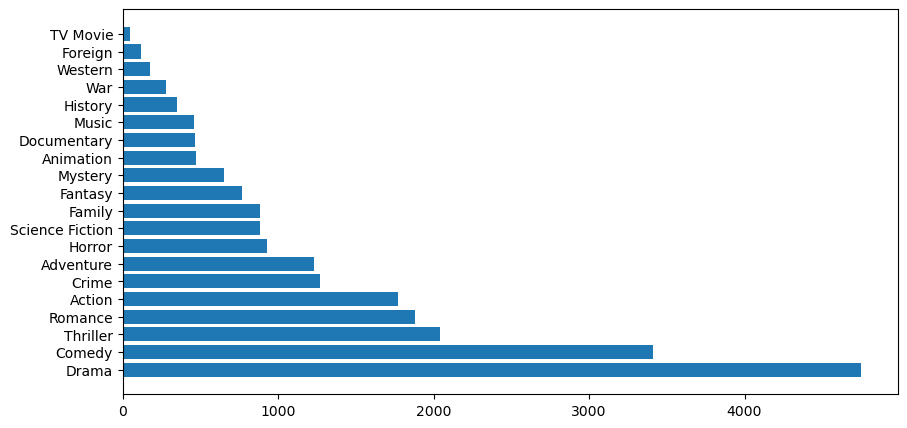

In [26]:
figure = plt.figure(figsize=(10, 5))
plt.barh(genres_dist.index, genres_dist.values)
plt.show()

## Movies

In [27]:
# number of unique movies
movie_df.movieId.nunique()

9082

## Number of rating per users

In [32]:
# number of rating per user
n_rating = rating_df.groupby('userId')['movieId'].count()
n_rating

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64

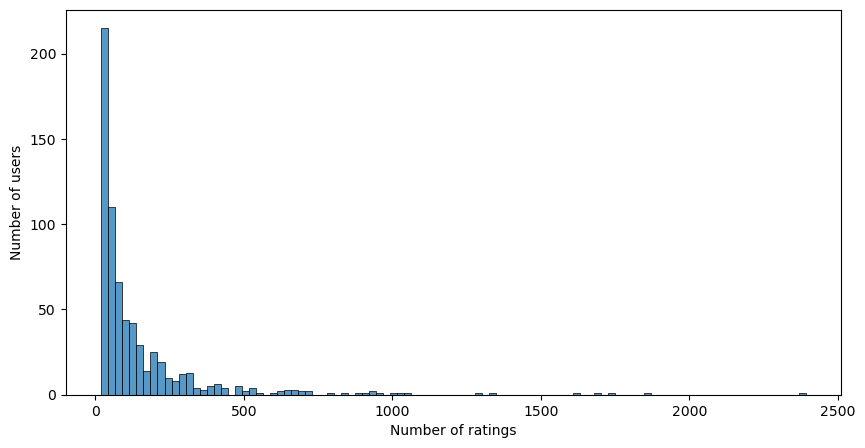

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(data=n_rating, x = n_rating.values, bins=100)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

In [54]:
len(n_rating[n_rating.values > 500])

37

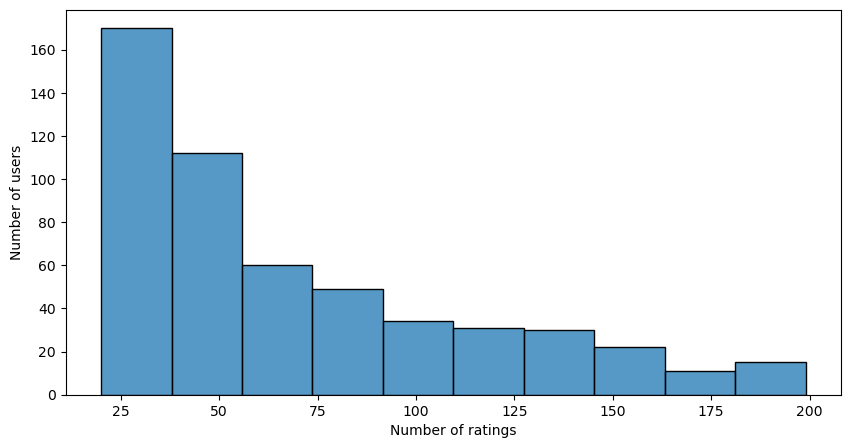

In [47]:
t = n_rating[n_rating.values < 200]
plt.figure(figsize=(10, 5))
sns.histplot(data=t, x =t.values, bins=10)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

# Rating distribution

<Axes: xlabel='rating', ylabel='Count'>

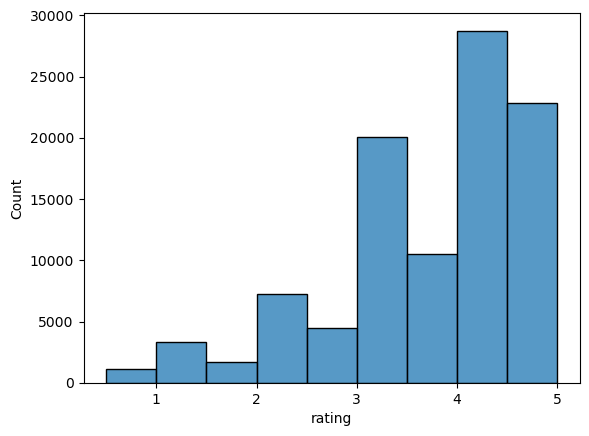

In [65]:
sns.histplot(rating_df.rating, binwidth=0.5)